**Survival Analysis** (also known as time-to-event analysis or duration analysis), aims to measure expected duration of time until one or more event happen.

__Survival function__ : $ S(t)=P(T>t)=1−F(t) $ 
$S(t)$ represents, for each time $t$, the probability that the time until the event is greater than this time $ t $, i.e. it model the probability that event of interest happen after time $ t $. In the context of cancer drug trail, a randomly selected patient will survive beyond time $ t $. Survival function  $ S(t) $ is :

- a decreasing function
- taking values in [0,1] (since it is a probability), and
- equal to 1 at t=0 and 0 at t=∞.



__Cumulative hazard function__: function defined as $$ H(t)=-logS(t) $$ and has the following properties.

- increasing function,
- taking value in $ [0,+∞] $, and
- $ S(t)=e^{−H(t)} $

__Hazard function__ or hazard rate is defined as:

$$
h(t) = \lim_{\Delta t \to 0} \frac{P(t \leq T  < t + \Delta t \mid T \geq t)}{\Delta t}
     = \frac{d}{dt} H(t)
$$ and has the following properties:

- positive function (not necessarily increasing or decreasing)
- the hazard function h(t) can have many different shapes and is therefore a useful tool to summarize survival data.

In the example of cancer patients, h(t) measures the instantaneous risk of dying right after time $t$ given the individual is alive at time $t$.

__Hazard function__ or hazard rate is defined as:

$$
h(t) = \lim_{\Delta t \to 0} \frac{P(t \leq T  < t + \Delta t \mid T \geq t)}{\Delta t}
     = \frac{d}{dt} H(t)
$$ and has the following properties:

- positive function (not necessarily increasing or decreasing)
- the hazard function h(t) can have many different shapes and is therefore a useful tool to summarize survival data.

In the example of cancer patients, h(t) measures the instantaneous risk of dying right after time $t$ given the individual is alive at time $t$.

__Estimation__:
To estimate the survival function, we need to use an estimator which is able to deal with censoring. The most common one is the nonparametric Kaplan and Meier (1958) estimator (also sometimes referred as the product-limit estimator, or more simply, the K-M estimator).

The advantages of the Kaplan-Meier estimator are that:

- it is simple and straightforward to use and interpret
- it is a nonparametric estimator, so it constructs a survival curve from the data and no assumptions is made about the shape of the underlying distribution
- it gives a graphical representation of the survival function(s), useful for illustrative purposes

In [1]:
# https://statsandr.com/blog/what-is-survival-analysis/#survival-function
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [2]:
subject = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
time = [3, 5, 7, 2, 18, 16, 2, 9, 16, 5]
event = [0, 1, 1, 1, 0, 1, 1, 1, 1, 0]

data = {'subject': subject, 
       'time': time,
        'event': event
       }
# print(data)

df = pd.DataFrame(data)
print(df)

   subject  time  event
0        1     3      0
1        2     5      1
2        3     7      1
3        4     2      1
4        5    18      0
5        6    16      1
6        7     2      1
7        8     9      1
8        9    16      1
9       10     5      0


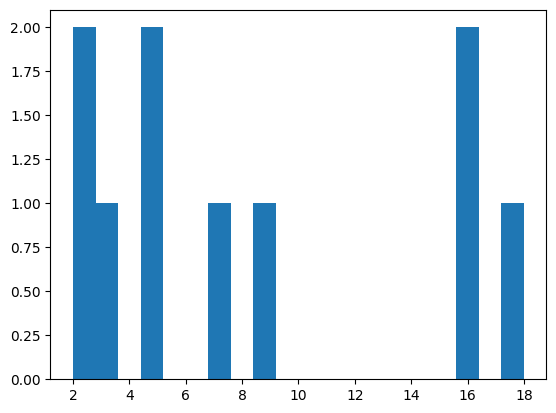

In [3]:
plt.hist(df['time'], bins=20)
plt.show()

<Axes: xlabel='timeline'>

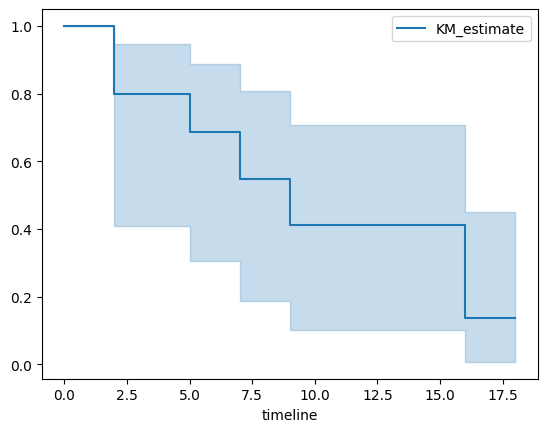

In [4]:
kmf = KaplanMeierFitter()
kmf.fit(durations = df['time'], event_observed = df['event'])
kmf.plot_survival_function()

We can generate the same plot without the 95% confidence interval using .survival_function_.plot() method.

Text(0.5, 1.0, 'Survival function')

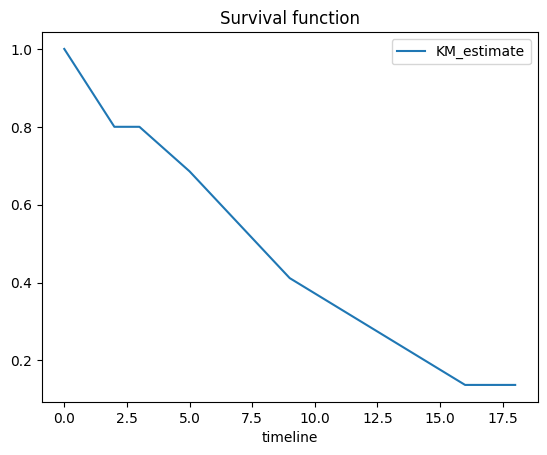

In [5]:
kmf.survival_function_.plot()
plt.title('Survival function')

We can also plot a failure curve. It is just opposite of survival, i.e., Failure/death probabilities over time.

<Axes: xlabel='timeline'>

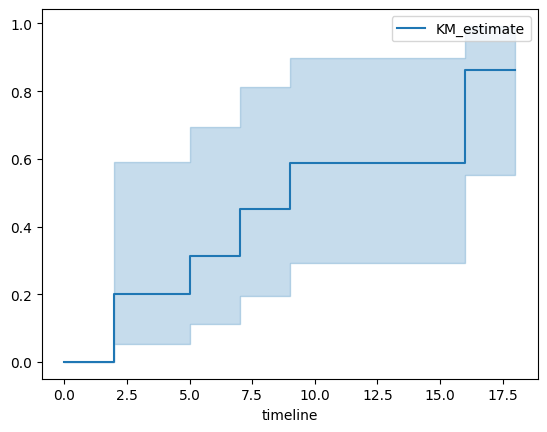

In [6]:
kmf.plot_cumulative_density()

__Median Survival Time and Confidence Intervals__: The next step is to estimate the median survival time and 95% confidence intervals. This can be done using the .median_survival_time_ and median_survival_times( ). Here, the median survival time is 310 days, which indicates that 50% of the sample live 310 days and 50% dies within this time. The 95% CI lower limit is 284 days, while the upper limit is 361 days.

In [7]:
from lifelines.utils import median_survival_times
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

9.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                     2.0                    16.0


<Axes: xlabel='timeline'>

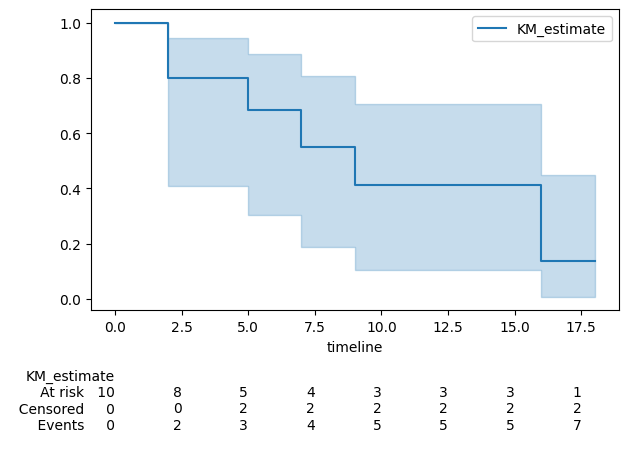

In [8]:
ax = plt.subplot(111)
kmf.plot_survival_function(ax = ax, at_risk_counts = True)

In [9]:
lung_dataset_path = '../input_data/lung.csv'
lung_df = pd.read_csv(lung_dataset_path)
print(lung_df.shape)
print(lung_df.head())

(228, 10)
   inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  meal.cal  \
0   3.0   306       1   74    1      1.0      90.0      100.0    1175.0   
1   3.0   455       1   68    1      0.0      90.0       90.0    1225.0   
2   3.0  1010       0   56    1      0.0      90.0       90.0       NaN   
3   5.0   210       1   57    1      1.0      90.0       60.0    1150.0   
4   1.0   883       1   60    1      0.0     100.0       90.0       NaN   

   wt.loss  
0      NaN  
1     15.0  
2     15.0  
3     11.0  
4      0.0  


The status consists of 1: censored and 2: dead; while, sex consist of 1: Male and 2 :Female

<Axes: xlabel='timeline'>

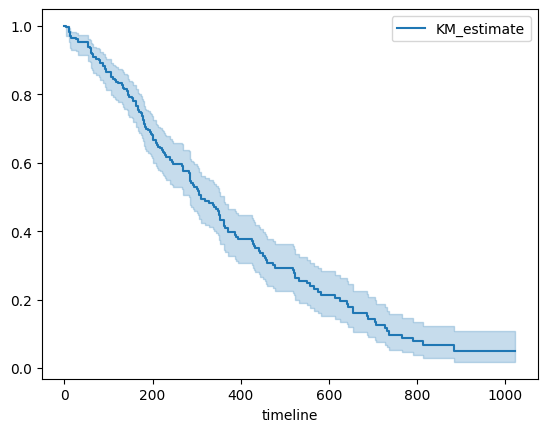

In [10]:
kmf = KaplanMeierFitter()
kmf.fit(durations = lung_df['time'], event_observed = lung_df['status'])
kmf.plot_survival_function()

Text(0.5, 1.0, 'Survival function')

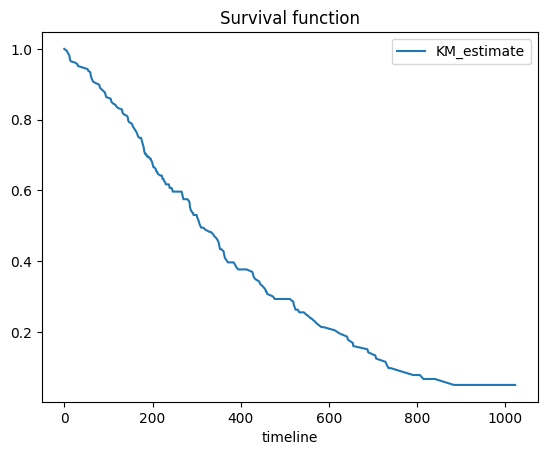

In [11]:
kmf.survival_function_.plot()
plt.title('Survival function')

<Axes: xlabel='timeline'>

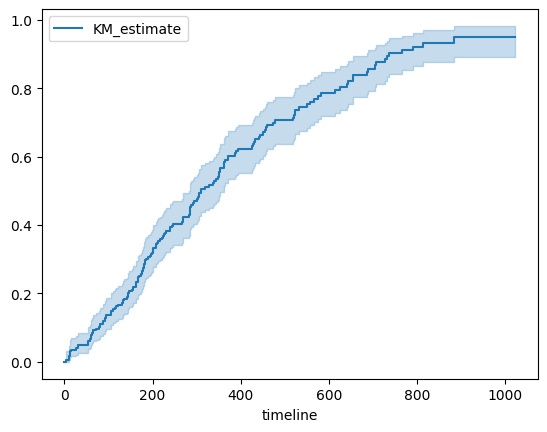

In [12]:
kmf.plot_cumulative_density()

In [13]:
from lifelines.utils import median_survival_times
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

310.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                   284.0                   361.0


In [14]:
dummies_ecog = pd.get_dummies(lung_df["ph.ecog"], prefix = 'ecog').astype(int)
dummies_ecog.columns = ["ecog_0",'ecog_1','ecog_2','ecog_3']
dummies_ecog.head(20)

,ecog_0,ecog_1,ecog_2,ecog_3
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,1,0
8,0,1,0,0
9,0,0,1,0


In [15]:
dummies_ecog = dummies_ecog[["ecog_1", "ecog_2"]]
lung_df = pd.concat([lung_df, dummies_ecog], axis = 1)
lung_df = lung_df.drop("ph.ecog", axis = 1)
lung_df.head()

,inst,time,status,age,sex,ph.karno,pat.karno,meal.cal,wt.loss,ecog_1,ecog_2
0,3.0,306,1,74,1,90.0,100.0,1175.0,NaN,1,0
1,3.0,455,1,68,1,90.0,90.0,1225.0,15.0,0,0
2,3.0,1010,0,56,1,90.0,90.0,NaN,15.0,0,0
3,5.0,210,1,57,1,90.0,60.0,1150.0,11.0,1,0
4,1.0,883,1,60,1,100.0,90.0,NaN,0.0,0,0


Text(0.5, 1.0, 'Survival of different gender group')

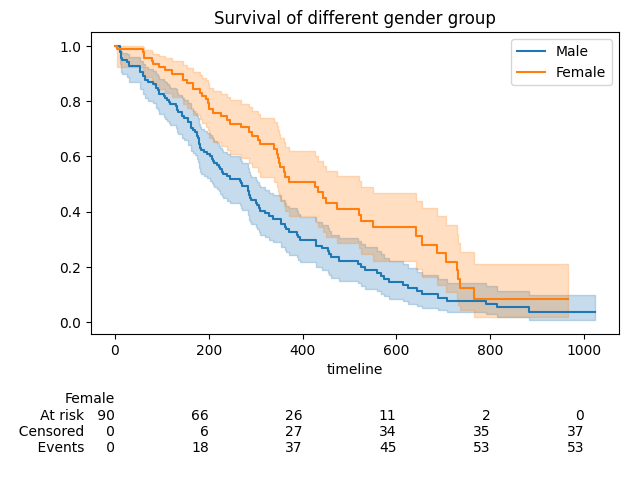

In [16]:
#KM Plot for Gender/Sex Categories
ax = plt.subplot(111)
# sex=1 (male) sex=2 (female)

kmf.fit(durations = lung_df[lung_df["sex"] == 1 ]["time"], event_observed = lung_df[lung_df["sex"] == 1]["status"], label = "Male")
kmf.plot_survival_function(ax = ax)
kmf.fit(durations = lung_df[lung_df["sex"] == 2 ]["time"], event_observed = lung_df[lung_df["sex"] == 2]["status"], label = "Female")
kmf.plot_survival_function(ax = ax, at_risk_counts = True)
plt.title("Survival of different gender group")

In [17]:
#Fitting log_rank test
from lifelines.statistics import logrank_test
result = logrank_test(lung_df['time'],lung_df['sex'],lung_df['status'])
result.test_statistic
result.p_value
result.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         478.69 <0.005    350.08